The purpose of this was to build a wordcloud with the limitations of my computer as my first 2 attempts were beyond the reach of my 2018 Powerbook. This a trivial exercise, but a first exposure to the idea for me. Using Alice’s Adventures in Wonderland with the chosen stopwords was nonsensical but I was just trying to get this to work. 

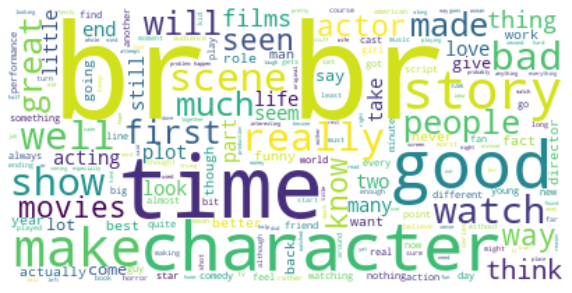

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Load the dataset in this case - 'Alice’s Adventures in Wonderland'
url = "https://www.gutenberg.org/files/11/11-0.txt"
data = pd.read_csv(url)

# Limit the dataset for testing purposes
data = data.sample(n=500)  # Use a smaller number of samples, in this case 500

# Preprocessing
data["review"] = data["review"].str.lower()

# Sentiment analysis using TextBlob
data["sentiment"] = data["review"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define sentiment labels based on sentiment score
data["sentiment_label"] = np.where(data["sentiment"] > 0, "positive", "negative")

# Combine all reviews into a single string
all_reviews = " ".join(review for review in data["review"])

# Define and update stopwords
stopwords = set(STOPWORDS)
stopwords.update(["movie", "film", "one", "see", "even", "like"])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [4]:
import pandas as pd
import requests

url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text

data = {'text': [text]}
df = pd.DataFrame(data)

print(df)


                                                text
0  ï»¿The Project Gutenberg eBook of Aliceâs Ad...
